In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
xlsx = pd.ExcelFile('data/CCPP/Folds5x2_pp.xlsx')
df = pd.read_excel(xlsx, 'Sheet1')
rows = df.shape[0]
columns = df.shape[1]
print('rows:', rows)
print('cols:', columns)

rows: 9568
cols: 5


#### 1 (b) (i):
>There are 9568 rows and 5 columns in the dataset <br>
>The rows represent the data points colected over 6 years for the respective columns (features) like Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) , Exhaust Vacuum (V) and prediction of Electrical Energy Output (PE)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222CF5028D0>,
      dtype=object)

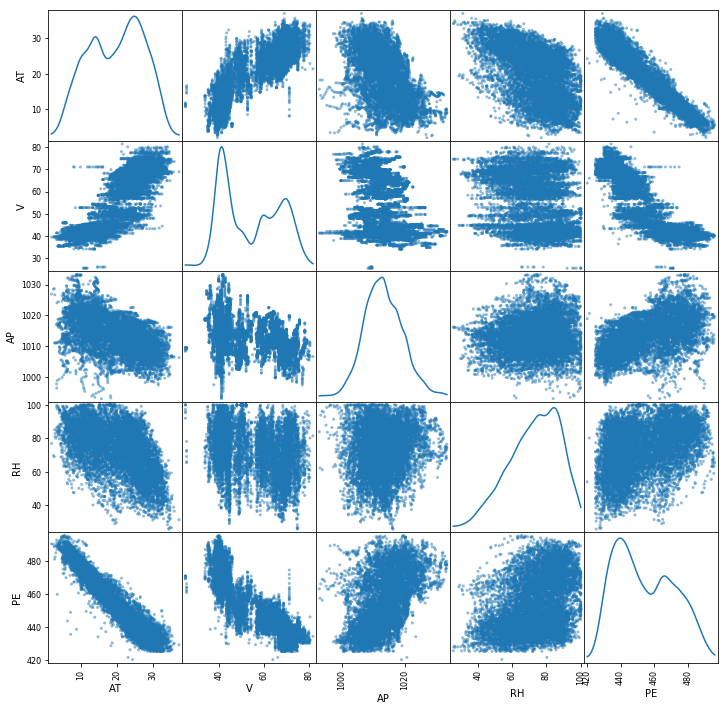

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (12,12), diagonal="kde")

#### 1. (b) (ii) Inference from the plot:
>=> there is an almost linear relationship between PE and negative of AT<br>
=> there is an approx. linear relationship between between PE and negative of V<br>
=> positive correlation between AT and V<br>

#### 1. (b) (iii) Summary of data

In [4]:
def get_summary(df):
    data_summary = df.describe()
    mean = data_summary['mean']
    median = data_summary['50%']
    data_range = data_summary['max'] - data_summary['min']
    first_quartile = data_summary['25%']
    third_quartile = data_summary['75%']
    interquartile_range = third_quartile - first_quartile
    return [mean, median, data_range, first_quartile, third_quartile, interquartile_range]

summary = []
AT = df['AT']
AT_values = get_summary(AT)
summary.append(AT_values)

V = df['V']
V_values = get_summary(V)
summary.append(V_values)

AP = df['AP']
AP_values = get_summary(AP)
summary.append(AP_values)

RH = df['RH']
RH_values = get_summary(RH)
summary.append(RH_values)

PE = df['PE']
PE_values = get_summary(PE)
summary.append(PE_values)

print(pd.DataFrame(summary, index = ['AT', 'V', 'AP', 'RH', 'PE'], \
                   columns = ['mean', 'median', 'range', '1st Quartile(25%)', '3rd Quartile(75%)', 'interquartile Range']))

           mean    median  range  1st Quartile(25%)  3rd Quartile(75%)  \
AT    19.651231    20.345  35.30            13.5100              25.72   
V     54.305804    52.080  56.20            41.7400              66.54   
AP  1013.259078  1012.940  40.41          1009.1000            1017.26   
RH    73.308978    74.975  74.60            63.3275              84.83   
PE   454.365009   451.550  75.50           439.7500             468.43   

    interquartile Range  
AT              12.2100  
V               24.8000  
AP               8.1600  
RH              21.5025  
PE              28.6800  


#### 1. (C) For each predictor, fit a simple linear regression model to predict the response. Describe your results.

In [5]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train_AT = df['AT'].to_numpy() # separating the dataset into feature-wise numpy arrays
X_train_V = df['V'].to_numpy()
X_train_AP = df['AP'].to_numpy()
X_train_RH = df['RH'].to_numpy()
Y_train_PE = df['PE'].to_numpy()

In [6]:
p = 0.05
simple_regression_coef = {}

def LinearRegression(X_train_feature, Y_train, feature_name): #function to perform simple linear regression for each feature
    X_train = sm.add_constant(X_train_feature, prepend=False)
    
    ols_model = sm.OLS(Y_train, X_train) #build the model
    ols_result = ols_model.fit()
    simple_regression_coef[feature_name] = ols_result.params  #recording the coeffieients for the model
    print(ols_result.summary())
    
    outliers = ols_result.outlier_test() #checking for outliers
    outliers_no = np.where(outliers[:, 2] < p)
    
    fig, axes = plt.subplots(figsize=(10, 5)) #plotting the data points and outliers for the regression model
    with plt.style.context('ggplot'):
        axes.scatter(X_train_feature, Y_train, alpha=0.3, label="Data points")
        axes.scatter(X_train_feature[outliers_no], Y_train[outliers_no], marker="+", label="Outliers")
        axes.plot(X_train_feature, ols_result.predict(X_train), "tab:red", alpha=0.8, label="Regression Result")
    axes.set_xlabel(feature_name)
    axes.set_ylabel("PE")
    axes.set_title("Linear Regression model for {}".format(feature_name))
    axes.legend()
    plt.show()
    
    outliers_data = np.vstack((X_train_feature[outliers_no], Y_train[outliers_no])) #print the outliers
    return pd.DataFrame(outliers_data.T, columns=[feature_name, "PE"])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:32:29   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1713      0.007   -291.715      0.0

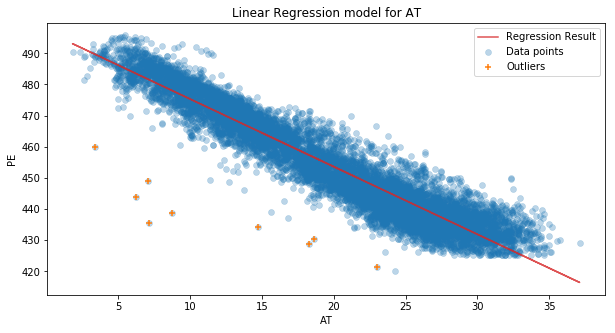

,AT,PE
0,8.74,438.63
1,6.22,443.73
2,14.69,434.12
3,23.00,421.57
4,18.60,430.38
5,7.06,448.97
6,7.14,435.58
7,18.26,428.67
8,3.40,459.86


In [7]:
outliers = LinearRegression(X_train_AT, Y_train_PE, "AT")
outliers

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:32:43   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1681      0.007   -172.402      0.0

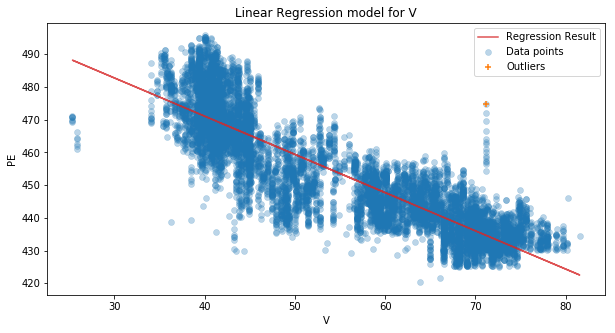

,V,PE
0,71.14,474.66


In [8]:
outliers = LinearRegression(X_train_V, Y_train_PE, "V")
outliers

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:32:56   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4899      0.025     59.296      0.0

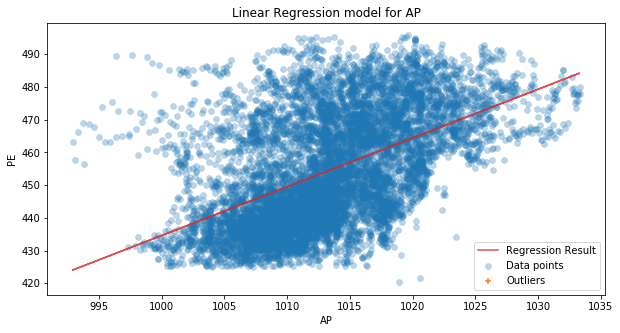

,AP,PE


In [9]:
outliers = LinearRegression(X_train_AP, Y_train_PE, "AP")
outliers

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:33:10   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4557      0.011     41.399      0.0

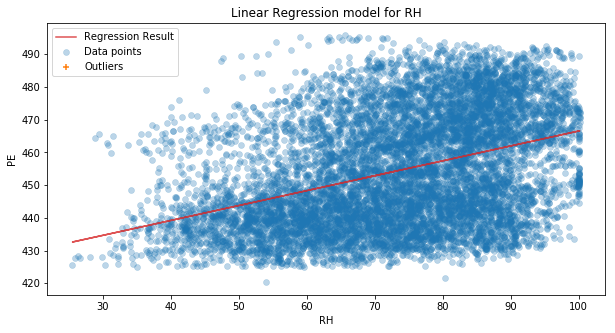

,RH,PE


In [10]:
outliers = LinearRegression(X_train_RH, Y_train_PE, "RH")
outliers

>There are some outliers for predictor AT and V

#### 1 (d) Fit a multiple regression model to predict the response using all of the predictors

In [11]:
# # Split trainset and testset by 0.2 fraction
# # X_train,X_test, X_train, Y_test = train_test_split

X_train_all = df.iloc[:, :-1].to_numpy() #considering all features
X_train_all = sm.add_constant(X_train_all, prepend=False)
ols_model = sm.OLS(Y_train_PE, X_train_all)
ols_result = ols_model.fit()

print(ols_result.summary())
print("p-values:", ols_result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:33:25   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9775      0.015   -129.342      0.0

>R-squared = 0.929 and p-values < 0.05, which means that the predictors are significant to the respone. We can reject the null hypothesis

#### 1. (e) Compare regression coefficients from 1 (c) and 1 (d)

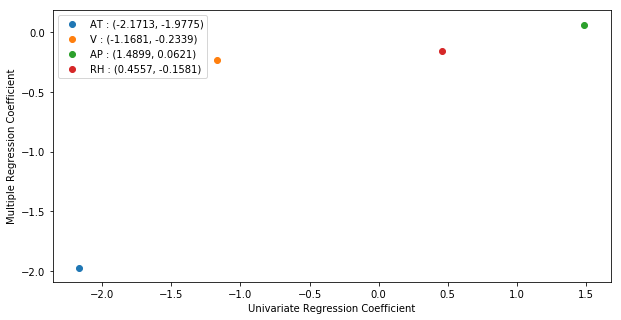

In [12]:
fig, axes = plt.subplots(figsize=(10, 5))
for i, feature in enumerate(df.columns[:-1]):
    text = "{} : ({}, {})".format(feature, np.around(simple_regression_coef[feature][0], 4), np.around(ols_result.params[i], 4))
    axes.scatter(simple_regression_coef[feature][0], ols_result.params[i], label=text)
axes.legend()
plt.xlabel('Univariate Regression Coefficient')
plt.ylabel('Multiple Regression Coefficient')
plt.show()

#### 1 (f): Is there evidence of nonlinear association between any of the predictors and the response?

In [13]:
from sklearn.preprocessing import PolynomialFeatures

X_data = df.loc[:, ['AT', 'V', 'AP', 'RH']]
Y_data = df.loc[:, ['PE']]
features = ['AT', 'V', 'AP', 'RH']
for f in features:
    X_data = df[f].values.reshape(-1,1)
    polynomial = PolynomialFeatures(degree = 3)
    X_transform_data = polynomial.fit_transform(X_data)
    sm.add_constant(X_transform_data)
    ols_model_trained = sm.OLS(Y_data, X_transform_data).fit()
    print('Predictor:', f)
    print('R-squared: ', ols_model_trained.rsquared)
    print(ols_model_trained.pvalues, '\n')

Predictor: AT
R-squared:  0.9118826627742724
const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64 

Predictor: V
R-squared:  0.775021977558942
const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64 

Predictor: AP
R-squared:  0.2748633041651849
const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64 

Predictor: RH
R-squared:  0.15374253544345973
const    0.000000
x1       0.000377
x2       0.000009
x3       0.000014
dtype: float64 



>for predictors AP and RH, R-squared is small, so they have non-linear association with the response

#### 1 (g) Is there evidence of association of interactions of predictors with the response?

In [14]:
#pairwise_inter = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'

pairwise_interaction = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH' 
ols_pairwise_model = smf.ols(formula = pairwise_interaction, data = df) # Build a full linear regression model with interactions
ols_result = ols_pairwise_model.fit()
print(ols_result.summary())
print(ols_result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:33:26   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

> V, (AT:V), (AT:RH), (V:AP) have p-values less than 0.05 (default alpha in statsmodel), so they are statistically significant
(AT: AP) has high p-value, it can never be considered statistically significant

#### 1 (h) Improve your model using possible interaction terms or non-linear associations between the predictors and response

In [15]:
import random
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_data = df.loc[:, ['AT', 'V', 'AP', 'RH']]
Y_data = df.loc[:, ['PE']]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.3) # Spilt the data into 70% training and 30% testing

In [16]:
X_train = sm.add_constant(X_train) # prediction on training set
model = sm.OLS(Y_train, X_train).fit()

train_model = model.predict(X_train)
train_MSE = mean_squared_error(Y_train, train_model)
print('The train MSE is:', train_MSE)

X_test = sm.add_constant(X_test) # prediction on testing set
test_model = model.predict(X_test)
test_MSE = mean_squared_error(Y_test, test_model)
print('The test MSE is:', test_MSE)

The train MSE is: 20.364483040419387
The test MSE is: 21.71653654139262


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
# model with all predictors, interaction and quadratic terms
formula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'

regression = smf.ols(formula = formula, data = pd.concat([X_train, pd.DataFrame(Y_train)],axis = 1))
model = regression.fit()
train_model = model.predict(sm.add_constant(X_train)) # Add const number at the end of formula
test_model = model.predict(sm.add_constant(X_test))
train_MSE = mean_squared_error(Y_train, train_model)
test_MSE = mean_squared_error(Y_test, test_model)
print("The train MSE: {}".format(train_MSE))
print("The test MSE: {}".format(test_MSE))
print(model.summary())
print(model.pvalues)

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The train MSE: 17.637163154015173
The test MSE: 19.236919085436856
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7400.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:33:27   Log-Likelihood:                -19113.
No. Observations:                6697   AIC:                         3.826e+04
Df Residuals:                    6682   BIC:                         3.836e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

> AT and V also have large p values, but by removing them, the principle of hierarchy will be violated so we keep them

In [18]:
# Remove insignificant interactions, when p-value > 0.05
        
new_formula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(AP**2) + I(RH**2) + AT:V + AT:RH + AP:RH'
regression = smf.ols(formula = new_formula, data = pd.concat([X_train, pd.DataFrame(Y_train)],axis = 1))
model = regression.fit()
train_model = model.predict(sm.add_constant(X_train))
test_model = model.predict(sm.add_constant(X_test))
train_MSE = mean_squared_error(Y_train, train_model)
test_MSE = mean_squared_error(Y_test, test_model)
print("Train MSE (after removing insignificant terms): {}".format(train_MSE))
print("Test MSE (after removing insignificant terms): {}".format(test_MSE))
print(model.summary())
# print(model.pvalues)

Train MSE (after removing insignificant terms): 17.69958108494305
Test MSE (after removing insignificant terms): 19.18731400382905
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:33:27   Log-Likelihood:                -19125.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6686   BIC:                         3.835e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### (i) KNN Regression

best k (training set) = 1 , smallest train MSE = :  0.0
best k (test set) = 5 , smallest test MSE =:  17.42534291745036


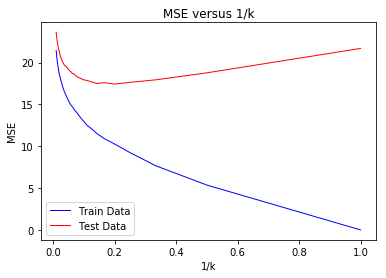

In [19]:
from sklearn import neighbors
from sklearn import preprocessing

def knn_mse(X_train, X_test, Y_train, Y_test):
    
    k_values = range(1,101,1)
    
    train_data = pd.DataFrame({'1/k':[], 'MSE':[]})
    test_data = pd.DataFrame({'1/k':[], 'MSE':[]})
    
    best_k_train = 1
    best_k_test = 1
    best_MSE_train = len(X_train)
    best_MSE_test = len(X_test)
    for k in k_values:

        model = neighbors.KNeighborsRegressor(n_neighbors=k) #train
        model.fit(X_train, Y_train)
        train_model = model.predict(X_train)
        train_MSE = mean_squared_error(Y_train, train_model)    
        train_data = train_data.append({'1/k':k, 'MSE':train_MSE}, ignore_index=True)

        if train_MSE <= best_MSE_train: # getting the best k value for training set
            best_MSE_train = train_MSE
            best_k_train = k
        
        test_model = model.predict(X_test) #test
        test_MSE = mean_squared_error(Y_test, test_model)
        test_data = test_data.append({'1/k':k, 'MSE':test_MSE}, ignore_index=True)
        if test_MSE <= best_MSE_test:  # getting the best k value for test set
            best_MSE_test = test_MSE
            best_k_test = k
            
    train_data['1/k'] = 1/train_data['1/k']
    test_data['1/k'] = 1/test_data['1/k']
    
    print('best k (training set) =', best_k_train, ', smallest train MSE = : ', best_MSE_train)
    print('best k (test set) =', best_k_test, ', smallest test MSE =: ', best_MSE_test)
    
    axes = plt.gca() # plot error curves
    axes.set_xlabel('1/k')
    axes.set_ylabel('MSE')
    axes.set_title("MSE versus 1/k")
    axes.plot(train_data['1/k'], train_data['MSE'], label = 'Train Data', color='blue', linewidth=1)
    axes.plot(test_data['1/k'], test_data['MSE'], label = 'Test Data', color='red', linewidth=1)
    plt.legend()
    

X_data = df.loc[:, ['AT', 'V', 'AP', 'RH']]
Y_data = df.loc[:, ['PE']]
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)
X_train = X_train.values #raw features
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

knn_mse(X_train, X_test, Y_train, Y_test)

best k (training set) = 1 , smallest train MSE = :  0.0
best k (test set) = 5 , smallest test MSE =:  16.24704028840126


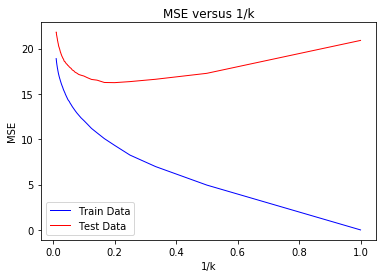

In [20]:
# using normalized data
X_train_normalized = preprocessing.scale(X_train)
X_test_normalized = preprocessing.scale(X_test)
knn_mse(X_train_normalized, X_test_normalized, Y_train, Y_test)

#### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

> Summary of TEST MSEs: 

> - Linear Regression (using all predictors) : 21.765
> - Linear Regression (all interactions): 19.236
> - Linear Regression (after removing insignificant terms) : 19.187
> - KNN Regression (raw features): 17.425
> - KNN Regression (normalized features) : 16.247

For this dataset, KNN regressor with normalized features seems to have a better performance according to the summary for recorded Test MSE .

### 2. ISLR 2.4.1

#### (a) 
>Flexible statistical learning method will perform better than an inflexible method when the sample size is large and number of predictors is small, as the inflexible method might suffer overfitting

#### (b)
>Inflexible statistical learning method will perform better than flexible method, as with smaller number of observations it is easy to fit the noise in flexible method which leads to overfitting

#### (c) 
>Flexible method is better than inflexible method as it is difficult to fit non-linear relationships in inflexible methods

#### (d) 
>Inflexible model is better in this case, as the data has significant noise due to high variance and a flexible model might suffer overfitting

### 3. ISLR 2.4.7

#### (a) Euclidean distance between each observation and test point:
>The Euclidean distance between obs[0] and the testpoint = √(3)<sup>2 </sup> = 3 <br>
The Euclidean distance between obs[1] and the testpoint = √(2)<sup>2 </sup> = 2 <br>
The Euclidean distance between obs[2] and the testpoint = √(1)<sup>2 </sup> + (3)<sup>2 </sup> = 3.162 <br>
The Euclidean distance between obs[3] and the testpoint = √(1)<sup>2 </sup> + (2)<sup>2 </sup> = 2.236 <br>
The Euclidean distance between obs[4] and the testpoint = √(-1)<sup>2 </sup> + (1)<sup>2 </sup> = 1.414 <br>
The Euclidean distance between obs[5] and the testpoint = √(1)<sup>2 </sup> + (1)<sup>2 </sup> + (1)<sup>2 </sup> = 1.73 <br>

#### (b) Prediction when k=1
>when k=1, euclidean distance is 0 and the nearest point is obs[5] => Green

#### (c) Prediction when k = 5

>when k = 3, the nearest points are obs[2], obs[5] and obs[6]. By majority polling, the prediction is Red

#### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

>Small k is better. A large k would consider more points, and would try to fit a linear boundary, whereas, with a smaller k and a non-linear boundary the model will fit the data in a better way and be more flexible 